# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Phase 2 of Design Project due 12/19
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)

## Week 10

 - Art of Electronics (AoE) Chapter 13
 - Analog Devices: [Mixed-Signal Electronic Systems](https://www.analog.com/en/education/education-library/tutorials/mixed-signal-electronics-systems.html)
     - [Data Converter Static Specifications](https://www.analog.com/media/en/training-seminars/tutorials/MT-010.pdf)
     - [Flash ADCs](https://www.analog.com/media/en/training-seminars/tutorials/MT-020.pdf)
     - [SAR ADCs](https://www.analog.com/media/en/training-seminars/tutorials/MT-021.pdf)
     - [Sigma Delta ADC Basics](https://www.analog.com/media/en/training-seminars/tutorials/MT-021.pdf)

## Overview

 - Last time...
     - Representation of signals
     - Sampling/aliasing
     - Quantization
 - Today...
     - ADC Performance
     - SAR ADC
     - Delta-Sigma ADC

## Python packages/modules

In [33]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft
from scipy.io import wavfile
from scipy import integrate
import csv
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_logx2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1, 'b')
    ax.semilogx(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1, 'b')
    ax.plot(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_logx3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1)
    ax.semilogx(x, y2)
    ax.semilogx(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
 
def plot_x3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1)
    ax.plot(x, y2)
    ax.plot(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel, ymin, ymax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    ax.set_ylim(ymin,ymax)
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))
    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_freqtrans(f, mag, x1label, y1label, tin, tran, x2label, y2label):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    axs[0].semilogx(f, 20*np.log10(mag))       
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])    
    
def plot_multifreqtrans(f, mags, x1label, y1label, tin, trans, x2label, y2label, labels):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    for mag in mags:
        axs[0].semilogx(f, 20*np.log10(mag))
        
    axs[0].legend( labels ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.2))    
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    for tran in trans:
        axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])
    
def SK_lowpass(Q, cn, fc, n, C, K):
   
    d = (n*(1-K)+1)
    a = d**2*Q**2
    b = 2*Q**2*d-n
    c = a
    
    m_a = (-b+np.sqrt(b**2-4*a*c))/2/a
    m_b = (-b-np.sqrt(b**2-4*a*c))/2/a
    
    C1 = C
    C2 = n*C1
    R2 =1/fc/2/np.pi/C1/np.sqrt(m_b*n)/cn
    R1 = R2*m_b

    return C1, C2, R1, R2

def plot_fft_dB(freqs, mags, fmin, fmax):
    fig, ax = plt.subplots(figsize = (10.0,7.5))
    ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')
    ax.set_xlim(fmin, fmax)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid()
    
def fft_mag(x, N, T, t):
    fft_sig  = fft(x, N)  
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    mags = 2.0/N * np.abs(fft_sig[0:N//2]) # single-sided FFT
    
    return freqs, mags

In [3]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 10 - Analog-to-Digital Converters

## ADC performance limitations

 - Noise and distortion in ADCs limit their maximum attainable resolution
 - For example, a 16-bit ADC doesn’t necessarily (and almost certainly doesnot) exhibit 16-bit performance
 - The effects of all ADC non-idealities are captured by the signal-to-noise-and-distortion ratio (SINAD)
 - From this ratio, we can determine the “effective number of bits” (ENOB), which gives a sense of the actual performance of the ADC

## Effective number of bits (ENOB)

 - For a full-scale input, the SQNR of an ideal ADC is given by

$$ SQNR = 20 \log_{10} \dfrac{(V_{FS}/2)\sqrt{2}}{V_{LSB}/\sqrt{12}} = 20\log_{10}(2^N\cdot\sqrt{1.5})\approx 6.02 N + 1.76 dB$$

 - From this expression we define the effective number of bits (ENOB) as
 
$$ ENOB = \dfrac{SINAD - 1.76dB}{6.02} $$

 - The notion of ENOB allows us to compare the performance of different ADCs with the same number of output bits

## Sampling noise

<center><img src="img/sampling_noise.png" width=700/></center>

$$ e_{n,sw}^2 = 4kTR_{sw} $$

$$ f_{enb} = \dfrac{1}{4R_{sw}C_{hold}} $$

$$ v_{n,sw(rms)} = \sqrt{\dfrac{kT}{C_{hold}}} $$

 - All real sampling switches (which are constructed using transistors) exhibit resistance and thus thermal noise
 - The total integrated noise (from the switch only) depends on the value of the hold capacitor $C_{hold}$
 - Higher sampling rates require smaller capacitors (to minimize the time constant $R_{sw}C_{hold}$), and this increases thermal noise

## Successive approximation (SAR) ADC

 - Whereas a Flash ADC determines the value of each bit in parallel, a Successive Approximation (SAR) ADC does so in sequence
 - SAR ADCs use a binary search algorithm to determine the value of each output bit in succession, successively approximating the input
 - Due the serial operation, SAR ADCs require a minimum of N clock cycles for an N-bit converter, making them substantially slower than Flash converters
 - However, improvements in digital processing technology and transistor size reduction have enabled the design of high-resolution (> 16 bits) SAR ADCs with clock rates as high as 100 Msps
 - Linearity in SAR ADCs is limited by capacitor mismatch

## SAR ADC architecture

<center><img src="img/SAR_architecture.png" width=1600/></center>

## 3-bit SAR ADC

<center><img src="img/3bit_SAR_ADC.png" width=1200 /></center>

 - Input voltage $V_{in}$ is sampled onto a binary-weighted capacitor array
 - Charge is redistributed based on each successive comparator decision
 - The capacitor/switch array forms a digital-to-analog converter referred to as a “charge-redistribution DAC” (CDAC)

## Sampling phase

<center><img src="img/SAR_sampling.png" width=800/></center>

 - During the sampling phase, the input voltage is sampled onto the full capacitor array, such that $Q = V_{in}\cdot 8C$
 - Comparisons are performed for each bit of the output
 - During the conversion process, the charge on the array is added to or subtracted from based on the decision for each bit
 - For this example, $V_{in} = \dfrac{1}{3}V_{ref} $

## Redistribution phase

<center><img src="img/SAR_redistribution.png" width=700/></center>

$$V_{in} = \dfrac{1}{3}V_{ref} $$

$$ V_{DAC,init} = -V_{in} $$

\begin{align}
V_{DAC,MSB} &= V_{ref} \dfrac{4C}{C_{tot}} - V_{in}\\
\\
&= \dfrac{V_{ref}}{2}-V_{in}
\end{align}

 - As the bottom plate of each capacitor in the array is connected to $V_{ref}$, $V_{DAC}$ is set by the ratio of that capacitor to the total array capacitance
 - $V_{DAC}$ is either greater or less than zero, depending on the value of $V_{in}$
 - The comparator output $D_{out}$ sets the switch state for the current bit, and the conversion proceeds to the next bit

## MSB (Bit 2) decision

<center><img src="img/MSB_decision.png" width=700/></center>

$$ V_{in} = \dfrac{1}{3}V_{ref} $$

$$ V_{DAC} = \dfrac{V_{ref}}{2}-V_{in} $$

$$ D_{out} = b_2 = 0$$

 - The bottom plate of MSB capacitor is connected to $V_{ref}$, which sets the DAC voltage $V_{DAC}$ to $V_{ref}/2 − V_{in}$
 - If $V_{in} > V_{ref}/2$, the output of the comparator $D_{out} = 1$
 - If $V_{in} < V_{ref}/2$, the output of the comparator is $D_{out} = 0$
 - The comparator output sets the MSB switch position for subsequent decisions

## Bit 1 decision

<center><img src="img/N_minus_2_decision.png" width=700/></center>

$$ V_{in} = \dfrac{1}{3}V_{ref} $$


$$ V_{DAC} = 0\cdot\dfrac{V_{ref}}{2} + \dfrac{V_{ref}}{4} - V_{in} $$

$$D_{out} = b_1 = 1 $$

 - Next, the bottom plate of the $(N-2)_{th}$ capacitor is connected to $V_{ref}$, which drives the DAC voltage $V_{DAC}$ to $V_{ref}/4 − V_{in}$
 - If $V_{in} > V_{ref}/4$, the output of the comparator $D_{out} = 1$
 - If $V_{in} < V_{ref}/4$, the output of the comparator is $D_{out} = 0$
 - Again, the comparator output sets the switch position for the bottom plate of the $(N-1)_{th}$ capacitor

## Bit 0 decision (LSB)

<center><img src="img/LSB_decision.png" width=700/></center>

$$ V_{in} = \dfrac{1}{3}V_{ref} $$

$$ V_{DAC} = 0\cdot\dfrac{V_{ref}}{2} + 1\cdot\dfrac{V_{ref}}{4} +\dfrac{V_{ref}}{2^N}- V_{in} $$

$$D_{out} = b_0 = 1$$

 - The comparator decision for the $(N-2)_{th}$ bit is retained in the form of charge on the CDAC
 - The final comparison determines the LSB of the output code and completes the conversion process

## Conversion example

 - The output code successively approximates the input voltage by comparing the input against reference levels in a step-wise fashion
 - Based on the previous conversion examples, the output code is
 
$$ D[2:0] = 011 $$

 - This corresponds to a measured voltage of
 
$$ V_{sample} = 3\cdot V_{LSB} = 3\cdot \dfrac{V_{ref}}{8} $$
 - Each conversion step requires a single clock cycle, such that the overall sampling frequency is limited by the number of output bits

<center><img src="img/SAR_conversion.png" width=800/></center>

## Nyquist-rate sampling

 - When sampling at the Nyquist rate (2x the input signal bandwidth), further filtering (e.g. in software) is typically not needed 
 - In this case, the quantization noise is fixed and the effective resolution is set by the raw quantization error
 - This requires the use of an ADC whose *raw* resolution  (i.e number of output bits $N$) meets the application requirements
 - The quantization noise in this case is given by
 
$$ v_{nq(rms)} = \dfrac{V_{ref}}{2^N\cdot \sqrt{12}} $$

<center><img src="img/Nyquist_sampling.png" width=800/></center>

## Oversampling

 - As we have seen, sampling a signal at frequencies higher than the Nyquist rate (i.e. oversampling) provides an advantage with respect to quantization noise
 - After sampling, software/digital filtering can be applied to limit the noise bandwidth and improve effective resolution
 - The quantization noise in with oversampling is given by

\begin{align} 
v_{nq,os(rms)} &= \dfrac{V_{ref}}{2^N\cdot \sqrt{12}} \cdot \sqrt{\dfrac{f_{enb}}{f_s/2}} \\
\\
&= \dfrac{V_{ref}}{2^N\cdot \sqrt{12}} \cdot \dfrac{1}{\sqrt{OSR}}
\end{align}

 - In addition to lowering quantization noise density, shifting the burden of filtering to the digital domain can be beneficial in terms of cost and precision

<center><img src="img/oversampling.png" width=800/></center>

## Noise shaping

 - Oversampling has limited benefits, since the effective voltage noise density only scales as $1/\sqrt{OSR}$
 - If, in addition to oversampling, we can shape the quantization noise so that filtering is more effective in removing it, we can achieve even higher resolution
 - This is accomplished by a process called “noise shaping,” and is the fundamental principle of DeltaSigma converter operation

<center><img src="img/noise_shaping.png" width=800/></center>

## Delta-Sigma modulation

<center><img src="img/delta_sigma_modulator.png" width=1200/></center>

 - A low-resolution quantizer (e.g. 1-bit) is combined with oversampling and negative feedback to realize an *average* quantization error much lower than that of the raw quantization
 - The Delta-Sigma modulator (DSM) output is applied to a digital filter for averaging and down-sampling
 - The Delta-Sigma converter architecture trades speed for precision

## 1-bit Delta-Sigma ADC

<center><img src="img/1bit_delta_sigma_ADC.png" width=1700/></center>

## Z-domain representation

<center><img src="img/Z_domain.png" width=1500/></center>

 - A phase delay is represented in the frequency domain as a complex exponential, the magnitude of which is 1
 - Because delays are so common in digital systems, we instead use the term $z^{−1}$ (which signifies the complex z-plane) to simplify the expressions

## Discrete-time integrator

<center><img src="img/discrete_integrator.png" width=1500/></center>

 - Integration in the digital domain (or, "accumulation") is as simple as continually adding (at the rising edge of each clock period) the current input value to the accumulated sum of all previous inputs
 - The integrator can be thought of as a summing, or averaging, element, as it “remembers” the input value over a long period of time
 - Hence, the integrator emphasizes-low frequency the low frequency content of its input (low-pass behavior)

## Discrete-time differentiator

<center><img src="img/discrete_differentiator.png" width=1500/></center>

 - The differentiator processes the difference between input values occurring in sequence
 - The differentiator can be thought of as processing the change in the input (differentiation is the process of taking the derivative)
 - As a result, the differentiator emphasizes high-frequency information (high-pass behavior)

## DSM linear model

<center><img src="img/DSM_linear_model.png" width=900/></center>

 - The DSM can be modeled as a linear feedback look with quantization error added to the output
 - Using superposition, we can analyze the loop processing of the input and quantization noise separately
 - The integrator element provides high low-frequency open-loop gain, similar to that of an opamp

## Signal transfer function

<center><img src="img/DSM_STF.png" width=700/></center>

$$ v_e = v_{in} - v_{out} \:\:\:\:\:\:\:\: v_{out} = \dfrac{(v_{in}-v_{out})z^{-1}}{1-z^{-1}}$$

$$STF =  \dfrac{v_{out}}{v_{in}} = \dfrac{z^{-1}}{1 - z^{-1} + z^{-1} } = z^{-1} $$


 - The signal merely passes through the modulator with a delay ▪ We call the relationship between the input signal and output signal the “signal transfer function,” designated by $STF$
 - The situation is analogous to an opamp in unity-gain feedback, which hasa gain of 1 and a phase delay determined by the opamp bandwidth

## Noise transfer function

<center><img src="img/DSM_NTF.png" width=700/></center>

$$ v_e =  -v_{out} \:\:\:\:\:\:\:\: v_{out} = v_{int} + q_e$$

$$NTF =  \dfrac{v_{out}}{q_{e}} = 1-z^{-1} $$


 - Because it is added to the output after the integrator, the quantization error is differentiated instead of integrated
 - The transfer function with respect to the quantization noise has a highpass characteristic, suppressing it at low frequencies
 - This characteristic of the Delta-Sigma Modulator is referred to as “noise shaping,” and it is the fundamental advantage of the architecture

## Noise transfer function

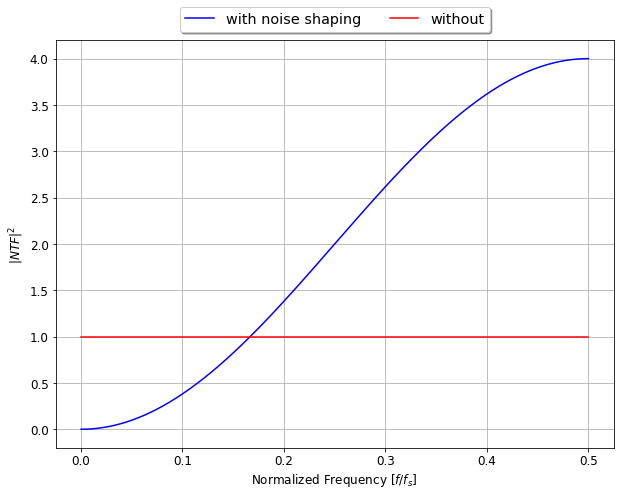

In [35]:
fs = 10e3
Vref = 3.3
nbits = 1
f = np.linspace(0, fs/2, 1000)

ntf = np.abs(1 - np.exp(-1j*2*np.pi*f/fs))**2
plot_x2y(f/fs, ntf, np.ones(np.size(f)), r'Normalized Frequency [$f/f_s$]', 
         r'$|NTF|^2$', 'with noise shaping', 'without')

 - At frequencies well below $f_s/2$, the NTF magnitude is much lower than 1
 - This means that if we filter the quantization noise with a noise bandwidth much lower than $f_s/2$, we can substantially reduce the effective quantization error

## RMS quantization noise

 - With oversampling alone, the in-band quantization noise is given by
 
$$ v_{nq,os(rms)} =  \dfrac{V_{LSB}}{\sqrt{12}} \cdot \dfrac{1}{\sqrt{OSR}} $$

 - With first-order noise shaping, the benefit is much more pronounced:
 
$$ v_{nq,ns(rms)} =  \dfrac{V_{LSB}}{\sqrt{12}} \cdot \dfrac{\pi}{3} \cdot \dfrac{1}{OSR^{3/2}} $$


<ipython-input-44-e6246c5bdc6f>:6: RuntimeWarning: divide by zero encountered in true_divide
  plot_logx2y(fs/f/2, vn_rms/vn_rms_tot, vn_rms_ns/vn_rms_tot, 'Oversampling Ratio (OSR)',


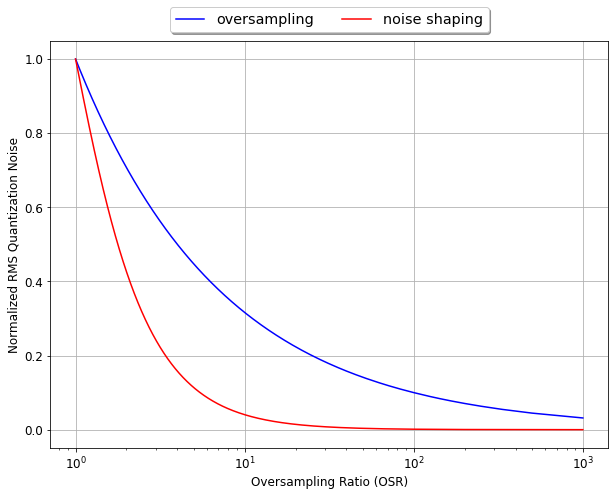

In [44]:
en_qe_2 = (Vref/2)**2/12/fs*np.ones(np.size(f))
vn_rms = np.sqrt(integrate.cumtrapz(2*en_qe_2, f, initial=0))
vn_rms_ns = np.sqrt(integrate.cumtrapz(en_qe_2*ntf, f, initial=0))
vn_rms_tot = Vref/np.sqrt(12)/2

plot_logx2y(fs/f/2, vn_rms/vn_rms_tot, vn_rms_ns/vn_rms_tot, 'Oversampling Ratio (OSR)',
        'Normalized RMS Quantization Noise', 'oversampling', 'noise shaping')

## Effective resolution

 - The effect of oversampling/noiseshaping on ADC performance can be quantified as an improvement in the effective resolution in terms of bits added
 - For oversampling alone, every doubling of the oversampling rate adds only 0.5 bits of resolution ▪ With 1st–order noise shaping, doubling the OSR adds 1.5 bits of resolution
 - Higher order DSMs can improve this even further!

<ipython-input-45-00fe2b6ff097>:2: RuntimeWarning: divide by zero encountered in true_divide
  plot_logx2y(fs/f/2,  (20*np.log10(vfs_rms/vn_rms)-1.76)/6.02 - 1, (20*np.log10(vfs_rms/vn_rms_ns)-1.76)/6.02 - 1,


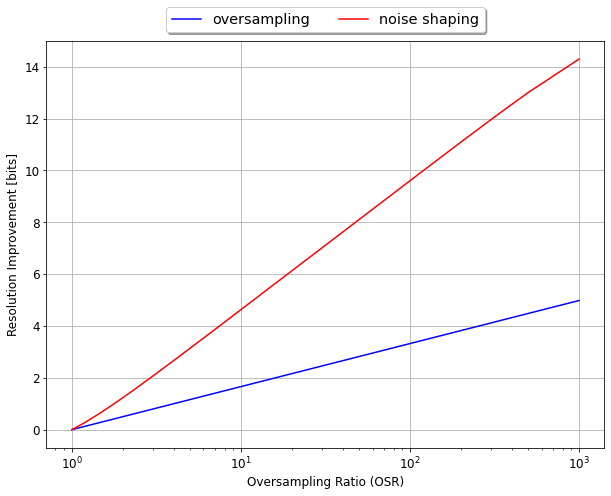

In [45]:
vfs_rms = Vref/2/np.sqrt(2)
plot_logx2y(fs/f/2,  (20*np.log10(vfs_rms/vn_rms)-1.76)/6.02 - 1, (20*np.log10(vfs_rms/vn_rms_ns)-1.76)/6.02 - 1,
           'Oversampling Ratio (OSR)', 'Resolution Improvement [bits]', 'oversampling', 'noise shaping')

## Higher-order modulators

 - The “order” of a Delta-Sigma modulator is increased by adding additional integrator stages
 - The noise transfer function for higher-order modulators can be expressed as

$$  |NTF|^M = |NTF_1|^M = \left(4\sin^2{\pi\frac{f}{f_s}}\right)^M $$

 - The quantization noise of an $M^{th}$-order modulator is given by

$$ v_{nq,M(rms)} = \dfrac{V_{LSB}}{\sqrt{12}} \cdot = \dfrac{\pi^M}{\sqrt{2M+1}} \cdot \dfrac{1}{OSR^{M+1/2}} $$


<ipython-input-46-b7a3cad8dd60>:6: RuntimeWarning: divide by zero encountered in true_divide
  plot_logx3y(fs/f/2, (20*np.log10(vfs_rms/vn_rms_ns)-1.76)/6.02 - 1, (20*np.log10(vfs_rms/vn_rms_2)-1.76)/6.02 - 1,
<ipython-input-46-b7a3cad8dd60>:7: RuntimeWarning: divide by zero encountered in true_divide
  (20*np.log10(vfs_rms/vn_rms_3)-1.76)/6.02 - 1, r'Oversampling Ratio (OSR)', r'Resolution Improvement [bits]',


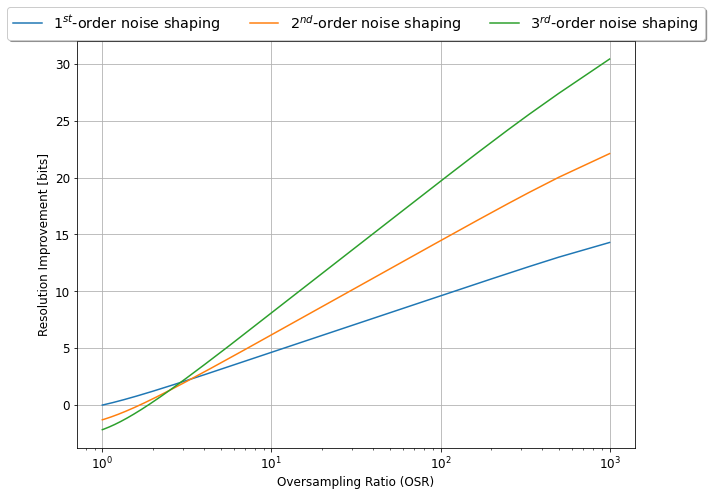

In [46]:
ntf_2 = ntf**2
ntf_3 = ntf**3
vn_rms_2 = np.sqrt(integrate.cumtrapz(2*en_qe_2*ntf_2, f, initial=0))
vn_rms_3 = np.sqrt(integrate.cumtrapz(2*en_qe_2*ntf_3, f, initial=0))

plot_logx3y(fs/f/2, (20*np.log10(vfs_rms/vn_rms_ns)-1.76)/6.02 - 1, (20*np.log10(vfs_rms/vn_rms_2)-1.76)/6.02 - 1,
            (20*np.log10(vfs_rms/vn_rms_3)-1.76)/6.02 - 1, r'Oversampling Ratio (OSR)', r'Resolution Improvement [bits]',
            r'$1^{st}$-order noise shaping', r'$2^{nd}$-order noise shaping', r'$3^{rd}$-order noise shaping')
            